<a href="https://colab.research.google.com/github/wannasmile/colab_code_note/blob/main/IRC006.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

def Num(data, feature, mth):
    """
    计算特征在mth个月内出现的次数。

    参数：
        data (pd.DataFrame): 数据集。
        feature (str): 特征名称。
        mth (int): 月份数。

    返回值：
        tuple: (特征名称_num+月份数, 特征出现次数)。
    """
    df = data.loc[:, feature + '1': feature + str(mth)]  # 提取特征在mth个月内的值
    auto_value = np.where(df > 0, 1, 0).sum(axis=1)  # 计算特征出现次数
    return feature + '_num' + str(mth), auto_value

def Avg(data, feature, mth):
    """
    计算特征在mth个月内的平均值。

    参数：
        data (pd.DataFrame): 数据集。
        feature (str): 特征名称。
        mth (int): 月份数。

    返回值：
        tuple: (特征名称_avg+月份数, 特征平均值)。
    """
    df = data.loc[:, feature + '1': feature + str(mth)]  # 提取特征在mth个月内的值
    auto_value = np.nanmean(df, axis=1)  # 计算特征平均值
    return feature + '_avg' + str(mth), auto_value

def Msg(data, feature, mth):
    """
    计算特征在mth个月内首次出现月份。

    参数：
        data (pd.DataFrame): 数据集。
        feature (str): 特征名称。
        mth (int): 月份数。

    返回值：
        tuple: (特征名称_msg+月份数, 特征首次出现月份)。
    """
    df = data.loc[:, feature + '1': feature + str(mth)]  # 提取特征在mth个月内的值
    df_value = np.where(df > 0, 1, 0)  # 将特征值转换为0/1
    auto_value = []
    for i in range(len(df_value)):
        row_value = df_value[i, :]  # 获取一行数据
        if row_value.max() <= 0:  # 如果特征在mth个月内都没有出现
            indexs = '0'  # 将首次出现月份设置为0
            auto_value.append(indexs)
        else:
            indexs = 1  # 初始化首次出现月份为1
            for j in row_value:
                if j > 0:  # 如果特征出现
                    break  # 停止循环
                indexs += 1  # 否则，首次出现月份加1
            auto_value.append(indexs)
    return feature + '_msg' + str(mth), auto_value

def Cav(data, feature, mth):
    """
    计算特征在mth个月内的首月值与平均值的比值。

    参数：
        data (pd.DataFrame): 数据集。
        feature (str): 特征名称。
        mth (int): 月份数。

    返回值：
        tuple: (特征名称_cav+月份数, 特征首月值与平均值的比值)。
    """
    df = data.loc[:, feature + '1': feature + str(mth)]  # 提取特征在mth个月内的值
    auto_value = df[feature + '1'] / np.nanmean(df, axis=1)  # 计算特征首月值与平均值的比值
    return feature + '_cav' + str(mth), auto_value



def Mai(feature, mth, data):
    """
    计算特征在过去mth个月内的最大下降值。

    参数：
        feature (str): 特征名称。
        mth (int): 月份数。
        data (pd.DataFrame): 数据集。

    返回值：
        tuple: 包含特征名称和最大下降值的元组。
    """
    arr = np.array(data.loc[:, feature + '1': feature + str(mth)])  # 提取特征在过去mth个月内的值，并转换为NumPy数组
    auto_value = []  # 初始化一个空列表，用于存储最大下降值
    for i in range(len(arr)):  # 遍历每一行数据
        df_value = arr[i, :]  # 获取当前行的数据
        value_lst = []  # 初始化一个空列表，用于存储当前行的下降值
        for k in range(len(df_value) - 1):  # 遍历当前行的数据，计算相邻两个值之间的差值
            minus = df_value[k] - df_value[k + 1]  # 计算差值
            value_lst.append(minus)  # 将差值添加到列表中
        auto_value.append(np.nanmax(value_lst))  # 将当前行的最大下降值添加到列表中
    return feature + '_mai' + str(mth), auto_value  # 返回特征名称和最大下降值


def Ran(feature, mth, data):
    """
    计算特征在过去mth个月内的范围。

    参数：
        feature (str): 特征名称。
        mth (int): 月份数。
        data (pd.DataFrame): 数据集。

    返回值：
        tuple: 包含特征名称和范围的元组。
    """
    df = data.loc[:, feature + '1': feature + str(mth)]  # 提取特征在过去mth个月内的值
    auto_value = np.nanmax(df, axis=1) - np.nanmin(df, axis=1)  # 计算范围，即最大值减去最小值
    return feature + '_ran' + str(mth), auto_value  # 返回特征名称和范围

In [2]:
!wget https://raw.githubusercontent.com/wannasmile/colab_code_note/main/data_for_tree.xlsx

--2025-01-25 04:03:47--  https://raw.githubusercontent.com/wannasmile/colab_code_note/main/data_for_tree.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8881601 (8.5M) [application/octet-stream]
Saving to: ‘data_for_tree.xlsx’

data_for_tree.xlsx  100%[===================>]   8.47M  --.-KB/s    in 0.1s    

2025-01-25 04:03:48 (59.1 MB/s) - ‘data_for_tree.xlsx’ saved [8881601/8881601]



In [3]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import os

#指定路径
#os.environ["PATH"]
#读取数据
data = pd.read_excel('data_for_tree.xlsx', nrows=50000)
data.head(10)

,uid,oil_actv_dt,create_dt,total_oil_cnt,pay_amount_total,class_new,bad_ind,oil_amount,discount_amount,sale_amount,amount,pay_amount,coupon_amount,payment_coupon_amount,channel_code,oil_code,scene,source_app,call_source
0,A8217710,2018-08-19,2018-08-17,275.0,48295495.4,B,0,3308.56,1760081.0,1796001.0,1731081.0,8655401.0,1.0,1.0,1,3,2,0,3
1,A8217710,2018-08-19,2018-08-16,275.0,48295495.4,B,0,4674.68,2487045.0,2537801.0,2437845.0,12189221.0,1.0,1.0,1,3,2,0,3
2,A8217710,2018-08-19,2018-08-15,275.0,48295495.4,B,0,1873.06,977845.0,997801.0,961845.0,4809221.0,1.0,1.0,1,2,2,0,3
3,A8217710,2018-08-19,2018-08-14,275.0,48295495.4,B,0,4837.78,2526441.0,2578001.0,2484441.0,12422201.0,1.0,1.0,1,2,2,0,3
4,A8217710,2018-08-19,2018-08-13,275.0,48295495.4,B,0,2586.38,1350441.0,1378001.0,1328441.0,6642201.0,1.0,1.0,1,2,2,0,3
5,A8217710,2018-08-19,2018-08-12,275.0,48295495.4,B,0,2135.72,1115045.0,1137801.0,1097045.0,5485221.0,1.0,1.0,1,2,2,0,3
6,A8217710,2018-08-19,2018-08-11,275.0,48295495.4,B,0,1894.18,979609.0,999601.0,963609.0,4818041.0,1.0,1.0,1,2,2,0,3
7,A8217710,2018-08-19,2018-08-09,275.0,48295495.4,B,0,4795.80,2528009.0,2579601.0,2486009.0,12430041.0,1.0,1.0,1,3,2,0,3
8,A8217710,2018-08-19,2018-08-07,275.0,48295495.4,B,0,4883.58,2526441.0,2578001.0,2484441.0,12422201.0,1.0,1.0,1,3,2,0,3
9,A8217710,2018-08-19,2018-08-06,275.0,48295495.4,B,0,3475.14,1763609.0,1799601.0,1734609.0,8673041.0,1.0,1.0,1,2,2,0,3


In [4]:
org_lst = ['uid','create_dt','oil_actv_dt','class_new','bad_ind']
agg_lst = ['oil_amount','discount_amount','sale_amount','amount','pay_amount','coupon_amount','payment_coupon_amount']
dstc_lst = ['channel_code','oil_code','scene','source_app','call_source']

In [5]:
import pandas as pd
import numpy as np

def generate_features(data, org_lst, agg_lst, dstc_lst):
    """
    生成用户特征。

    参数：
        data (pd.DataFrame): 原始数据集。
        org_lst (list): 原始特征列表。
        agg_lst (list): 需要进行聚合操作的特征列表。
        dstc_lst (list): 需要保留的离散特征列表。

    返回值：
        pd.DataFrame: 包含用户特征的新数据集。
    """
    df = data[org_lst].copy()  # 复制原始特征
    df[agg_lst] = data[agg_lst].copy()  # 复制需要进行聚合操作的特征
    df[dstc_lst] = data[dstc_lst].copy()  # 复制需要保留的离散特征

    base = df[org_lst].copy()  # 复制原始特征，用于获取每个用户的唯一标识
    base = base.drop_duplicates(['uid'], keep='first')  # 保留每个用户的第一次出现记录



    """
    连续值处理
    """
    gn = pd.DataFrame()  # 初始化一个空的数据框，用于存储用户特征

    for i in agg_lst:  # 遍历需要进行聚合操作的特征
        # 计算特征值个数
        tp = pd.DataFrame(df.groupby('uid').apply(lambda df: len(df[i]), include_groups=False).reset_index())  # 按用户分组，计算特征值个数
        tp.columns = ['uid', i + '_cnt']  # 重命名列名
        gn = tp if gn.empty else pd.merge(gn, tp, on='uid', how='left')  # 将结果合并到 gn 数据框中

        # 求历史特征值大于零的个数
        tp = pd.DataFrame(df.groupby('uid').apply(lambda df: np.where(df[i] > 0, 1, 0).sum(), include_groups=False).reset_index())  # 按用户分组，计算特征值大于零的个数
        tp.columns = ['uid', i + '_num']  # 重命名列名
        gn = tp if gn.empty else pd.merge(gn, tp, on='uid', how='left')  # 将结果合并到 gn 数据框中

        # 对历史数据求和
        tp = pd.DataFrame(df.groupby('uid').apply(lambda df: np.nansum(df[i]) if len(df[i]) > 0 else np.nan, include_groups=False).reset_index())  # 按用户分组，对特征值求和
        tp.columns = ['uid', i + '_tot']  # 重命名列名
        gn = tp if gn.empty else pd.merge(gn, tp, on='uid', how='left')  # 将结果合并到 gn 数据框中

        # 对历史数据求均值
        tp = pd.DataFrame(df.groupby('uid').apply(lambda df: np.nanmean(df[i]) if len(df[i]) > 0 else np.nan, include_groups=False).reset_index())  # 按用户分组，对特征值求均值
        tp.columns = ['uid', i + '_avg']  # 重命名列名
        gn = tp if gn.empty else pd.merge(gn, tp, on='uid', how='left')  # 将结果合并到 gn 数据框中

        # 对历史数据求最大值
        tp = pd.DataFrame(df.groupby('uid').apply(lambda df: np.nanmax(df[i]) if len(df[i]) > 0 else np.nan, include_groups=False).reset_index())  # 按用户分组，对特征值求最大值
        tp.columns = ['uid', i + '_max']  # 重命名列名
        gn = tp if gn.empty else pd.merge(gn, tp, on='uid', how='left')  # 将结果合并到 gn 数据框中

        # 对历史数据求最小值
        tp = pd.DataFrame(df.groupby('uid').apply(lambda df: np.nanmin(df[i]) if len(df[i]) > 0 else np.nan, include_groups=False).reset_index())  # 按用户分组，对特征值求最小值
        tp.columns = ['uid', i + '_min']  # 重命名列名
        gn = tp if gn.empty else pd.merge(gn, tp, on='uid', how='left')  # 将结果合并到 gn 数据框中

    # 将生成的特征与基本信息合并
    gn = pd.merge(base, gn, on='uid', how='left')

    gc = pd.DataFrame()  # 初始化一个空的数据框，用于存储离散特征的统计信息

    """
    离散值处理
    """
    for i in dstc_lst:  # 遍历需要保留的离散特征
        # 计算每个用户该特征的不同值个数
        tp = pd.DataFrame(df.groupby('uid').apply(lambda df: len(set(df[i])), include_groups=False).reset_index())  # 按用户分组，计算特征的不同值个数
        tp.columns = ['uid', i + '_dstc']  # 重命名列名
        gc = tp if gc.empty else pd.merge(gc, tp, on='uid', how='left')  # 将结果合并到 gc 数据框中


    # 合并所有特征
    fn = gn.merge(gc, on='uid')  # 将基本信息、聚合特征和离散特征合并到一起
    print(fn.shape)  # 打印最终数据集的形状
    print(fn.columns)


    return fn  # 返回包含用户特征的新数据集

In [6]:
df = data[org_lst].copy()  # 复制原始特征
df[agg_lst] = data[agg_lst].copy()  # 复制需要进行聚合操作的特征
df[dstc_lst] = data[dstc_lst].copy()  # 复制需要保留的离散特征


base = df[org_lst].copy()  # 复制原始特征，用于获取每个用户的唯一标识
base = base.drop_duplicates(['uid'], keep='first')  # 保留每个用户的第一次出现记录

fn = generate_features(data, org_lst, agg_lst, dstc_lst)
fn.head(10)

<ipython-input-5-e6fd644ccc42>:48: RuntimeWarning: Mean of empty slice
  tp = pd.DataFrame(df.groupby('uid').apply(lambda df: np.nanmean(df[i]) if len(df[i]) > 0 else np.nan, include_groups=False).reset_index())  # 按用户分组，对特征值求均值
<ipython-input-5-e6fd644ccc42>:53: RuntimeWarning: All-NaN axis encountered
  tp = pd.DataFrame(df.groupby('uid').apply(lambda df: np.nanmax(df[i]) if len(df[i]) > 0 else np.nan, include_groups=False).reset_index())  # 按用户分组，对特征值求最大值
<ipython-input-5-e6fd644ccc42>:58: RuntimeWarning: All-NaN axis encountered
  tp = pd.DataFrame(df.groupby('uid').apply(lambda df: np.nanmin(df[i]) if len(df[i]) > 0 else np.nan, include_groups=False).reset_index())  # 按用户分组，对特征值求最小值
<ipython-input-5-e6fd644ccc42>:48: RuntimeWarning: Mean of empty slice
  tp = pd.DataFrame(df.groupby('uid').apply(lambda df: np.nanmean(df[i]) if len(df[i]) > 0 else np.nan, include_groups=False).reset_index())  # 按用户分组，对特征值求均值
<ipython-input-5-e6fd644ccc42>:53: RuntimeWarning: All-NaN axis encountere

(10698, 52)
Index(['uid', 'create_dt', 'oil_actv_dt', 'class_new', 'bad_ind',
       'oil_amount_cnt', 'oil_amount_num', 'oil_amount_tot', 'oil_amount_avg',
       'oil_amount_max', 'oil_amount_min', 'discount_amount_cnt',
       'discount_amount_num', 'discount_amount_tot', 'discount_amount_avg',
       'discount_amount_max', 'discount_amount_min', 'sale_amount_cnt',
       'sale_amount_num', 'sale_amount_tot', 'sale_amount_avg',
       'sale_amount_max', 'sale_amount_min', 'amount_cnt', 'amount_num',
       'amount_tot', 'amount_avg', 'amount_max', 'amount_min',
       'pay_amount_cnt', 'pay_amount_num', 'pay_amount_tot', 'pay_amount_avg',
       'pay_amount_max', 'pay_amount_min', 'coupon_amount_cnt',
       'coupon_amount_num', 'coupon_amount_tot', 'coupon_amount_avg',
       'coupon_amount_max', 'coupon_amount_min', 'payment_coupon_amount_cnt',
       'payment_coupon_amount_num', 'payment_coupon_amount_tot',
       'payment_coupon_amount_avg', 'payment_coupon_amount_max',
       '

,uid,create_dt,oil_actv_dt,class_new,bad_ind,oil_amount_cnt,oil_amount_num,oil_amount_tot,oil_amount_avg,oil_amount_max,...,payment_coupon_amount_num,payment_coupon_amount_tot,payment_coupon_amount_avg,payment_coupon_amount_max,payment_coupon_amount_min,channel_code_dstc,oil_code_dstc,scene_dstc,source_app_dstc,call_source_dstc
0,A8217710,2018-08-17,2018-08-19,B,0,137,137,492617.96,3595.751533,7952.82,...,137,137.0,1.0,1.0,1.0,1,3,1,1,1
1,A7261706,2018-08-01,2018-08-03,B,0,243,243,145830.84,600.126914,1481.00,...,243,243.0,1.0,1.0,1.0,1,2,3,1,1
2,A10920578,2018-08-31,2018-09-05,E,0,59,59,100928.26,1710.648475,6127.14,...,59,59.0,1.0,1.0,1.0,1,1,1,1,1
3,A1389291,2018-07-28,2018-08-01,C,0,48,48,67548.92,1407.269167,3119.02,...,48,48.0,1.0,1.0,1.0,1,1,1,1,2
4,A4260408,2018-09-02,2018-09-29,B,0,69,69,65624.72,951.082899,1963.42,...,69,69.0,1.0,1.0,1.0,1,1,2,1,1
5,A5249423,2018-10-24,2018-10-25,B,0,104,104,74018.86,711.719808,1510.32,...,104,104.0,1.0,1.0,1.0,1,1,1,1,1
6,A11545953,2018-08-24,2018-08-25,A,0,40,40,58138.56,1453.464000,3497.06,...,40,40.0,1.0,1.0,1.0,1,1,1,1,1
7,A3442915,2018-03-13,2018-05-22,D,0,43,43,57531.68,1337.946047,2478.06,...,43,43.0,1.0,1.0,1.0,1,1,2,1,2
8,A105347,2018-08-15,2018-09-23,B,0,63,63,54234.40,860.863492,1240.32,...,63,63.0,1.0,1.0,1.0,1,1,2,1,2
9,A1679426,2018-08-24,2018-08-27,B,0,64,64,49994.04,781.156875,2021.14,...,64,64.0,1.0,1.0,1.0,1,1,1,1,1


In [7]:
base.head(10)

,uid,create_dt,oil_actv_dt,class_new,bad_ind
0,A8217710,2018-08-17,2018-08-19,B,0
137,A7261706,2018-08-01,2018-08-03,B,0
380,A10920578,2018-08-31,2018-09-05,E,0
439,A1389291,2018-07-28,2018-08-01,C,0
487,A4260408,2018-09-02,2018-09-29,B,0
556,A5249423,2018-10-24,2018-10-25,B,0
660,A11545953,2018-08-24,2018-08-25,A,0
700,A3442915,2018-03-13,2018-05-22,D,0
743,A105347,2018-08-15,2018-09-23,B,0
806,A1679426,2018-08-24,2018-08-27,B,0


In [8]:
fn.head(10)

,uid,create_dt,oil_actv_dt,class_new,bad_ind,oil_amount_cnt,oil_amount_num,oil_amount_tot,oil_amount_avg,oil_amount_max,...,payment_coupon_amount_num,payment_coupon_amount_tot,payment_coupon_amount_avg,payment_coupon_amount_max,payment_coupon_amount_min,channel_code_dstc,oil_code_dstc,scene_dstc,source_app_dstc,call_source_dstc
0,A8217710,2018-08-17,2018-08-19,B,0,137,137,492617.96,3595.751533,7952.82,...,137,137.0,1.0,1.0,1.0,1,3,1,1,1
1,A7261706,2018-08-01,2018-08-03,B,0,243,243,145830.84,600.126914,1481.00,...,243,243.0,1.0,1.0,1.0,1,2,3,1,1
2,A10920578,2018-08-31,2018-09-05,E,0,59,59,100928.26,1710.648475,6127.14,...,59,59.0,1.0,1.0,1.0,1,1,1,1,1
3,A1389291,2018-07-28,2018-08-01,C,0,48,48,67548.92,1407.269167,3119.02,...,48,48.0,1.0,1.0,1.0,1,1,1,1,2
4,A4260408,2018-09-02,2018-09-29,B,0,69,69,65624.72,951.082899,1963.42,...,69,69.0,1.0,1.0,1.0,1,1,2,1,1
5,A5249423,2018-10-24,2018-10-25,B,0,104,104,74018.86,711.719808,1510.32,...,104,104.0,1.0,1.0,1.0,1,1,1,1,1
6,A11545953,2018-08-24,2018-08-25,A,0,40,40,58138.56,1453.464000,3497.06,...,40,40.0,1.0,1.0,1.0,1,1,1,1,1
7,A3442915,2018-03-13,2018-05-22,D,0,43,43,57531.68,1337.946047,2478.06,...,43,43.0,1.0,1.0,1.0,1,1,2,1,2
8,A105347,2018-08-15,2018-09-23,B,0,63,63,54234.40,860.863492,1240.32,...,63,63.0,1.0,1.0,1.0,1,1,2,1,2
9,A1679426,2018-08-24,2018-08-27,B,0,64,64,49994.04,781.156875,2021.14,...,64,64.0,1.0,1.0,1.0,1,1,1,1,1


In [9]:
# 划分特征和目标变量
x = fn.drop(['uid', 'oil_actv_dt', 'create_dt', 'bad_ind', 'class_new'], axis=1)  # 删除不需要的列，作为特征
y = fn.bad_ind.copy()  # 复制 bad_ind 列，作为目标变量

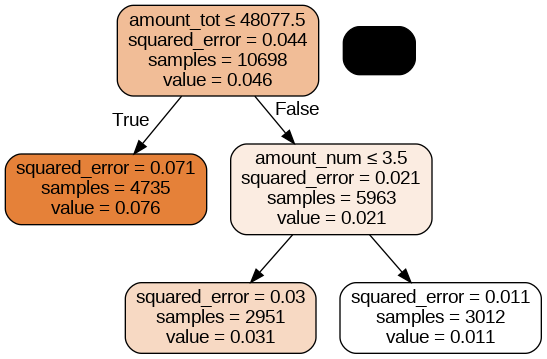

In [10]:
!pip install pydotplus
!pip install graphviz

from sklearn import tree
import pydotplus
from IPython.display import Image
# from sklearn.externals.six import StringIO  # Deprecated, use io.StringIO instead
from io import StringIO
import os
import pandas as pd

# 构建决策树模型
# max_depth: 树的最大深度，限制树的复杂度，防止过拟合
# min_samples_leaf: 叶节点最少样本数，防止叶子节点样本过少，提高模型泛化能力
# min_samples_split: 节点分裂最少样本数，防止节点过度分裂，提高模型泛化能力
dtree = tree.DecisionTreeRegressor(max_depth=2, min_samples_leaf=500, min_samples_split=5000)
dtree = dtree.fit(x,y)

# 可视化决策树
# 使用 StringIO 存储决策树图形数据
dot_data = StringIO()
# 导出决策树图形数据，并指定参数
# feature_names: 特征名称列表，用于在图形中显示特征
# class_names: 类别名称列表，用于在图形中显示类别
# filled: 是否填充节点颜色，使图形更易于阅读
# rounded: 是否使用圆角矩形表示节点，使图形更美观
# special_characters: 是否允许特殊字符，例如中文
tree.export_graphviz(dtree,
out_file=dot_data,
feature_names=x.columns,
class_names=['bad_ind'],
filled=True,
rounded=True,
special_characters=True)

# 使用 pydotplus 从图形数据创建图形对象
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# 在 Jupyter Notebook 中显示决策树图形
Image(graph.create_png())
# 将决策树图形保存为 PDF 文件
graph.write_pdf("tree.pdf")

# 可视化决策树
dot_data = StringIO()
tree.export_graphviz(dtree, out_file=dot_data,
                    feature_names=x.columns,
                    class_names=['bad_ind'],
                    filled=True, rounded=True,
                    special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# 直接在 Colab 中展示图形
display(Image(graph.create_png()))

In [11]:
!pip install PyPDF2  # 安装 PyPDF2 库，用于读取 PDF 文件内容
import PyPDF2
from IPython.display import display, HTML

with open("tree.pdf", "rb") as f:
    pdf_reader = PyPDF2.PdfReader(f)
    num_pages = len(pdf_reader.pages)
    html_content = ""
    for page_num in range(num_pages):
        page = pdf_reader.pages[page_num]
        html_content += page.extract_text()
    display(HTML(html_content))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 5.3 MB/s eta 0:00:00


In [12]:
# 根据决策树规则对用户进行分层
# dff1: amount_tot > 9614.5 且 coupon_amount_cnt > 6 的用户，标记为 'past_A'
dff1 = fn.loc[(fn.amount_tot>9614.5)&(fn.coupon_amount_cnt>6)].copy()
dff1['level'] = 'past_A'
# dff2: amount_tot > 9614.5 且 coupon_amount_cnt <= 6 的用户，标记为 'past_B'
dff2 = fn.loc[(fn.amount_tot>9614.5)&(fn.coupon_amount_cnt<=6)].copy()
dff2['level'] = 'past_B'
# dff3: amount_tot <= 9614.5 的用户，标记为 'past_C'
dff3 = fn.loc[fn.amount_tot<=9614.5].copy()
dff3['level'] = 'past_C'